# Breakout 1

S M Ali Zaidi Cohort 4 Violet

# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import matplotlib.pyplot as plt

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image= x_train[0]

In [5]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
single_image.shape

(28, 28)

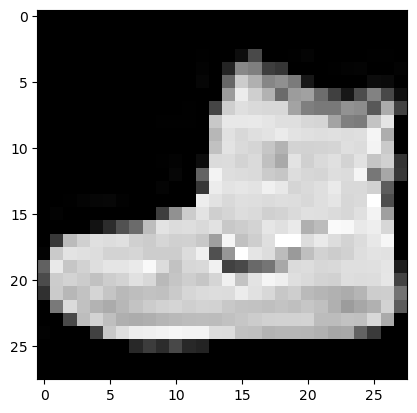

In [7]:
plt.imshow(single_image, cmap='gray')

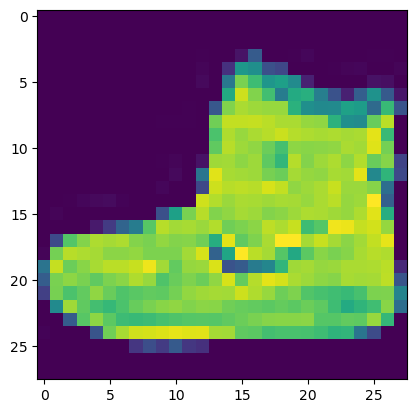

In [8]:
plt.imshow(single_image)
plt.show()

In [9]:
class_labels = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt","Sneaker","Bag","Ankle boot"]

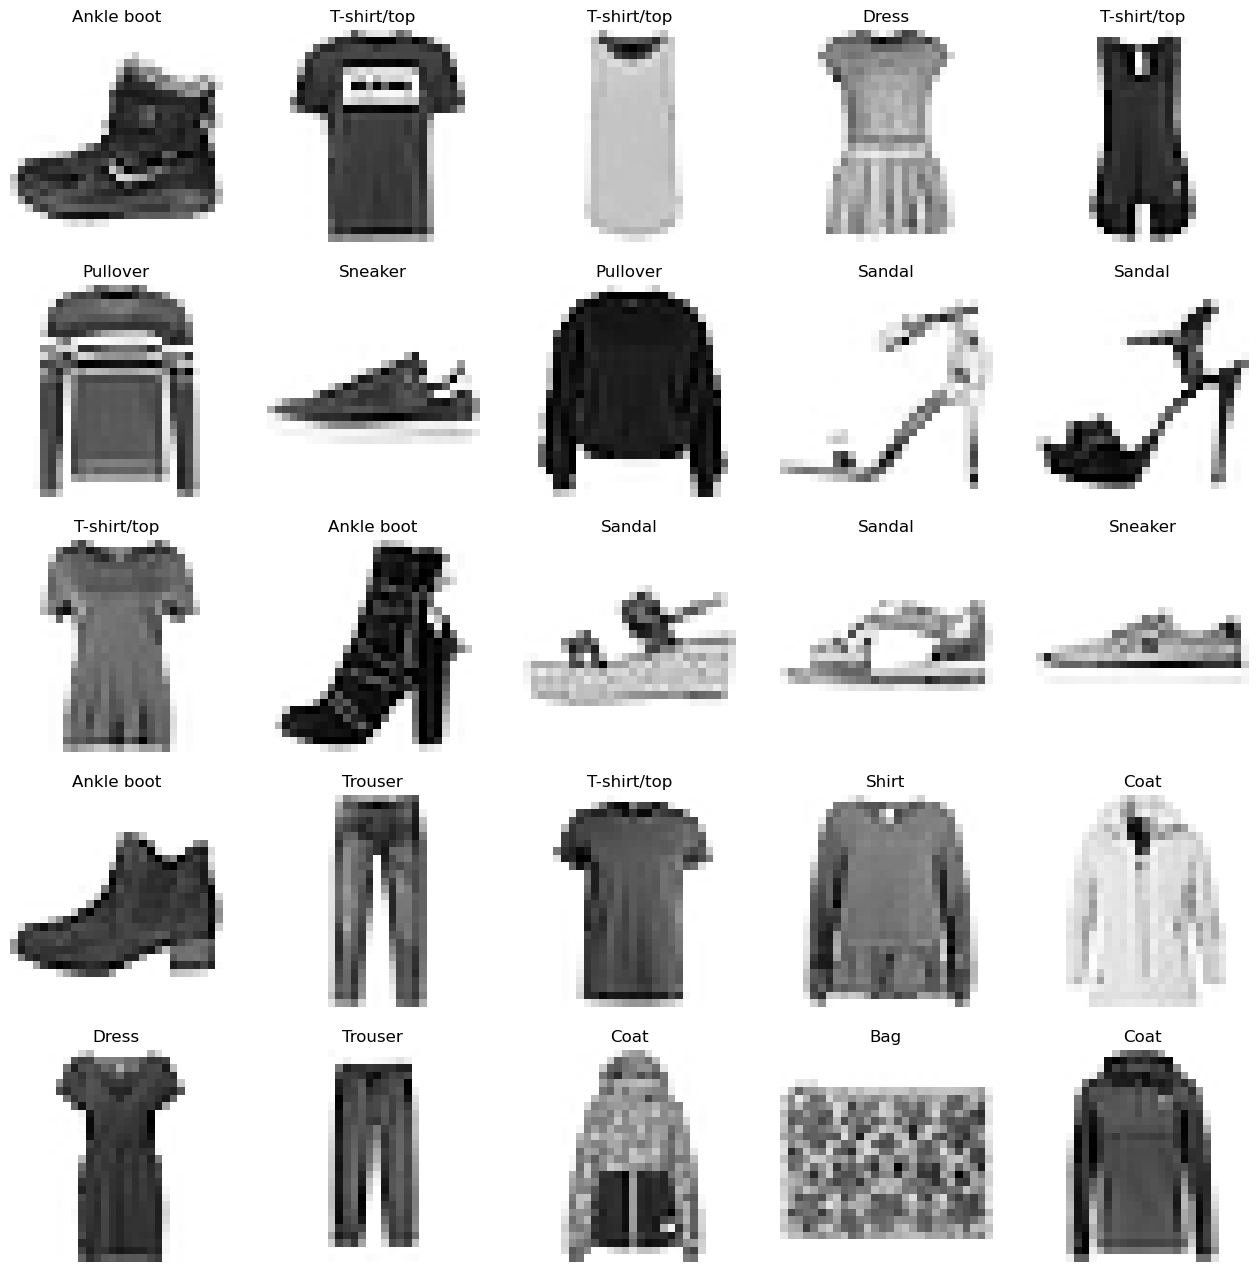

In [10]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='Greys')
    plt.axis('off')
    plt.title(class_labels[y_train[i]])

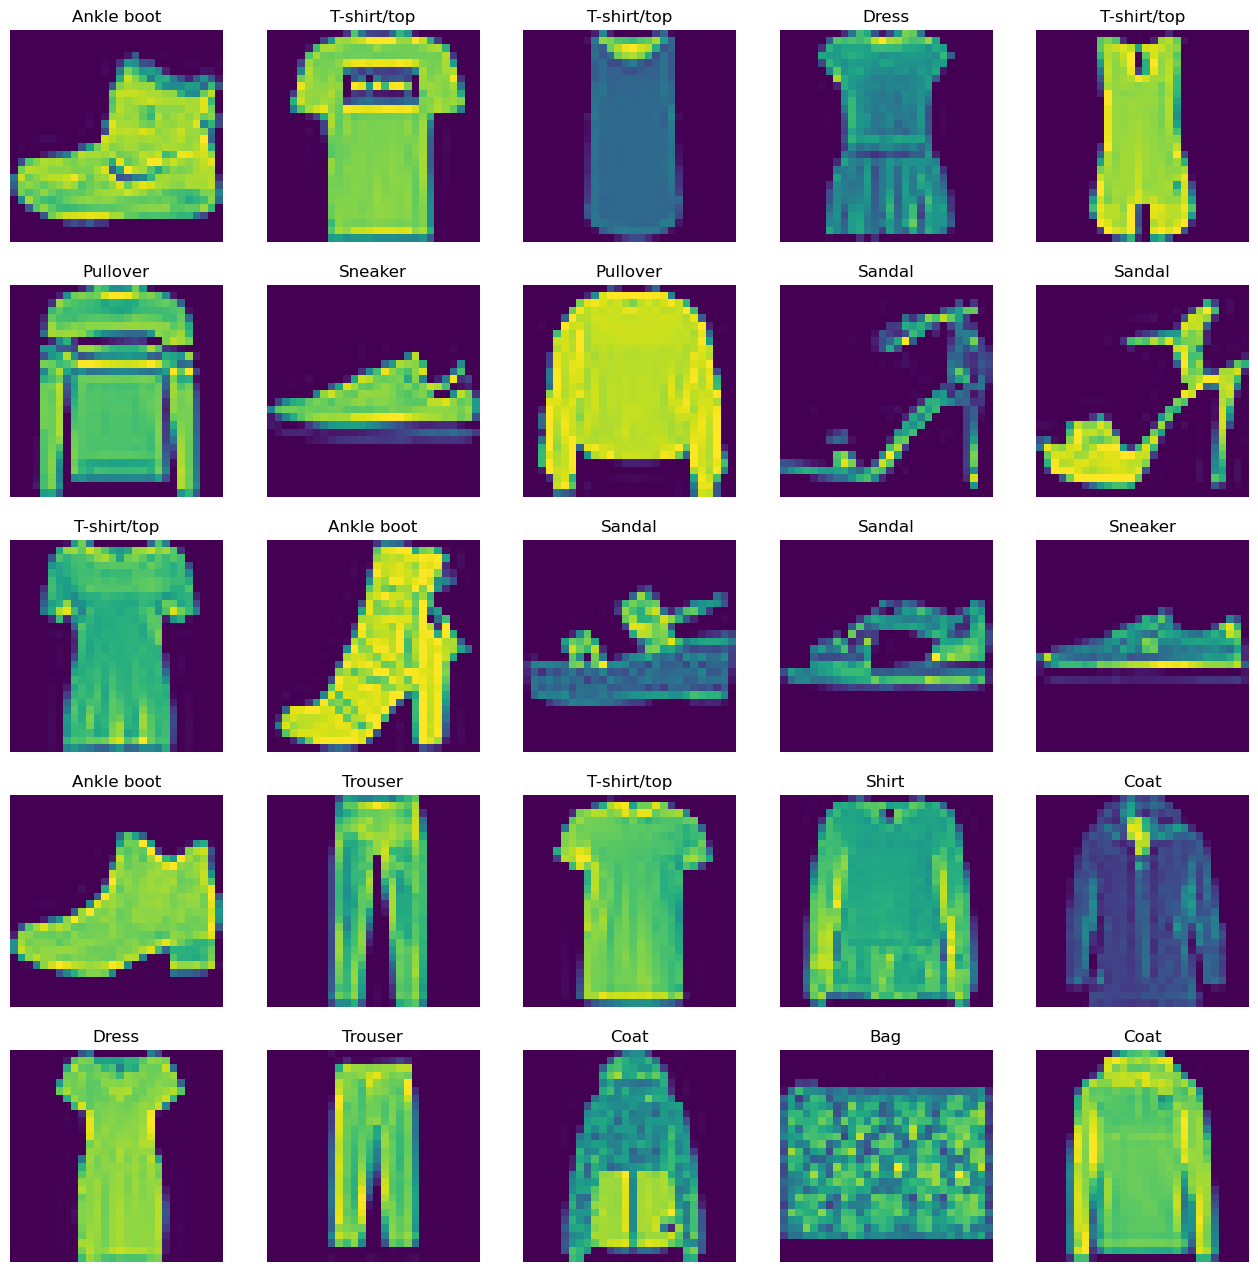

In [11]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_labels[y_train[i]])

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
single_image.max()

255

In [13]:
x_train= x_train/255
x_test= x_test/255

In [14]:
scaled_image= x_train[0]

In [15]:
scaled_image.min()

0.0

In [16]:
scaled_image.max()

1.0

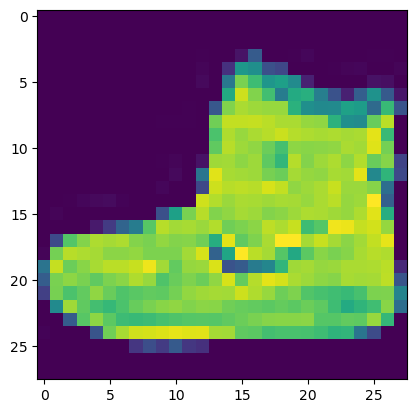

In [17]:
plt.imshow(scaled_image)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train= x_train.reshape(60000, 28, 28, 1)

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_test= x_test.reshape(10000, 28, 28, 1)

In [22]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train.shape

(60000,)

In [27]:
y_example= to_categorical(y_train)

In [28]:
y_example

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
y_example.shape

(60000, 10)

In [30]:
y_cat_train= to_categorical(y_train,10)

In [31]:
y_cat_test= to_categorical(y_test,10)

In [32]:
y_cat_test.shape

(10000, 10)

In [33]:
y_cat_train.shape

(60000, 10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [89]:
from tensorflow.python import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [87]:
# Model
model = Sequential()
# convolution 2D
model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(4, 4), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (4, 4), activation='relu'))
# dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))




In [90]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 4, 4, 64)         

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [92]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3)

In [100]:
# Fit the model
model.fit(x_train, y_cat_train, epochs=100, callbacks=[early_stopping])

Epoch 1/100
1875/1875 [==============================] - 63s 34ms/step - loss: 0.4442 - accuracy: 0.8410
Epoch 2/100
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3933 - accuracy: 0.8573
Epoch 3/100
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3621 - accuracy: 0.8684
Epoch 4/100
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3502 - accuracy: 0.8730
Epoch 5/100
1875/1875 [==============================] - 78s 41ms/step - loss: 0.3366 - accuracy: 0.8785
Epoch 6/100
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3239 - accuracy: 0.8830
Epoch 7/100
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3179 - accuracy: 0.8844
Epoch 8/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3128 - accuracy: 0.8874
Epoch 9/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3067 - accuracy: 0.8888
Epoch 10/100
1875/1875 [==============================]

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [101]:
model.metrics_names

['loss', 'accuracy']

In [102]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2553 - accuracy: 0.9097


[0.25528600811958313, 0.9096999764442444]

The test set also showed approximately similar results. The variance is minimal.

In [103]:
from sklearn.metrics import classification_report
import numpy as np

In [104]:
predictions= model.predict(x_test)
prediction_classes= np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 6ms/step


In [105]:
report= classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.87      0.86      1000
           3       0.89      0.94      0.91      1000
           4       0.86      0.83      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.71      0.72      1000
           7       0.94      0.99      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Except 7th index most of the results are above 80% and among those above 80% mostly are above 95% which depicts are good performance of the model in predicting the unseen images

# Great Job!